# Part I - Avocado Sales Volume and Price Analysis
## by Sydney Russler


### Table of Contents

* [Introduction](#intro)
* [Preliminary Wrangling](#wrangling)
* [Data Exploration](#explore)
    * [Univariate Exploration](#uni)
    * [Bivariate Exploration](#bi)
    * [Multivariate Exploration](#multi)
* [Conclusion](#conclusion)
* [Sources](#sources)

## Introduction<a class="anchor" id="intro"></a>

This dataset was download from Kaggle at the link https://www.kaggle.com/neuromusic/avocado-prices and originally sourced from the Hass Avocado Board website in May of 2018 at this link http://www.hassavocadoboard.com/retail/volume-and-price-data.

As described by Hass:
> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

According to the Hass Avocado Board website, the Product Lookup codes are assigned as follows:

> Small/Medium Hass Avocado (~3-5oz avocado) | #4046 Avocado

> Large Hass Avocado (~8-10oz avocado) | #4225 Avocado

> Extra Large Hass Avocado (~10-15oz avocado) | #4770 Avocado

## Preliminary Wrangling<a class="anchor" id="wrangling"></a>


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
avocados = pd.read_csv('avocado.csv')

In [4]:
print(avocados.shape)
print(avocados.dtypes)
print(avocados.head(10))

(18249, 14)
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11

In [5]:
avocados.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
avocados.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Cleaning and formatting the data:
* Reformat column names for easier coding (replace spaces with _ and change all letters to lowercase)
* Rename PLU number columns to descriptive names {'4046':'small_medium', '4225':'large', '4770':'extra_large'}
* Drop extra index column 'unnamed:_0'
* Date column should be type 'datetime'
* Year column should be type 'object'
* Convert type to binary data, with 1 representing convential and 0 representing organic.
* Create column 'season_name' to categorize each observation by season based on the date.

In [8]:
# Reformat column names
# Change all letters to lowercase
avocados.columns= avocados.columns.str.lower()

# Replaces spaces with '_'
avocados.columns = avocados.columns.str.replace(' ','_')
avocados.rename(columns={'averageprice':'average_price'}, inplace=True)

In [9]:
# Rename PLU number columns to descriptive names 
avocados.rename(columns={'4046':'small_medium', '4225':'large', '4770':'extra_large'}, inplace=True)

In [10]:
# Drop extra index column 'unnamed:_0'
avocados.drop(columns='unnamed:_0', inplace=True)

In [11]:
# Change date column to datetime type
avocados['date'] = pd.to_datetime(avocados['date'])

In [12]:
# Change year column to object type
avocados['year'] = avocados.year.astype('str')

In [13]:
# Convert type to binary data, with 1 representing organic and 0 representing conventional
avocados[['conventional', 'organic']] = pd.get_dummies(avocados['type'])

# Drop unnecessary columns
avocados.drop(columns = ['type', 'conventional'], inplace=True)

In [14]:
# Use date to create categorical 'season_name' column
avocados['season'] = (avocados['date'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

avocados['season_name'] = avocados['season'].map(seasons)

# Drop unnecessary 'season' column
avocados.drop(columns='season', inplace=True)

In [15]:
# Convert season_name to ordinal categorical types
ordinal_var_dict = {'season_name': ['Spring', 'Summer', 'Autumn', 'Winter']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    avocados[var] = avocados[var].astype(ordered_var)

In [16]:
# Test data cleaning
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           18249 non-null  datetime64[ns]
 1   average_price  18249 non-null  float64       
 2   total_volume   18249 non-null  float64       
 3   small_medium   18249 non-null  float64       
 4   large          18249 non-null  float64       
 5   extra_large    18249 non-null  float64       
 6   total_bags     18249 non-null  float64       
 7   small_bags     18249 non-null  float64       
 8   large_bags     18249 non-null  float64       
 9   xlarge_bags    18249 non-null  float64       
 10  year           18249 non-null  object        
 11  region         18249 non-null  object        
 12  organic        18249 non-null  uint8         
 13  season_name    18249 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(9), object(2), uint8(1)
mem

### What is the structure of your dataset?

There are 18,249 rows of weekly sales with 12 variables (date, average price, total volume, volume per size (small/medium, large, or extra large), volume per bag size (small, large, xlarge), year, region, and organic or conventional. Most variables are numeric, representing the volume of sales. Year, region, and organic are categorical. 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how price, season, and organic or not influence volume sold.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that price will have the largest effect on volume sold, then season. I don't think organic or not will influence the volume sold.

# Data Exploration<a class="anchor" id="explore"></a>

## Univariate Exploration<a class="anchor" id="uni"></a>


I will start by looking at the distribution of the main variable of interest: volume.

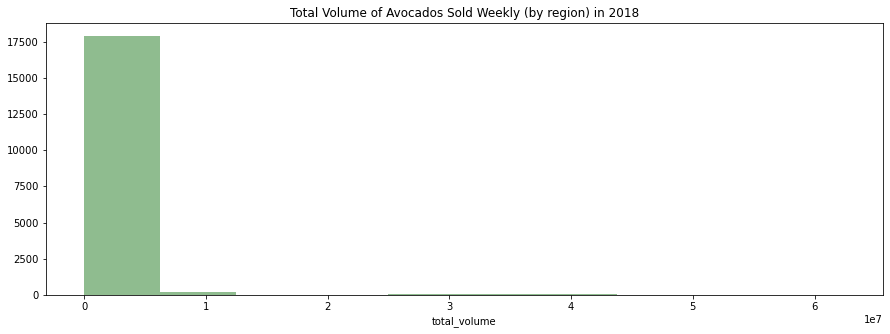

In [17]:
# Histogram of volume of avocados sold in a week
# start with a standard-scaled plot
binsize=5
bins = np.arange(avocados['total_volume'].min(), avocados['total_volume'].max()+binsize, binsize)


plt.figure(figsize=[15, 5])
plt.hist(data = avocados, x = 'total_volume', color='darkseagreen')
plt.title('Total Volume of Avocados Sold Weekly (by region) in 2018')

plt.xlabel('total_volume')
plt.show()

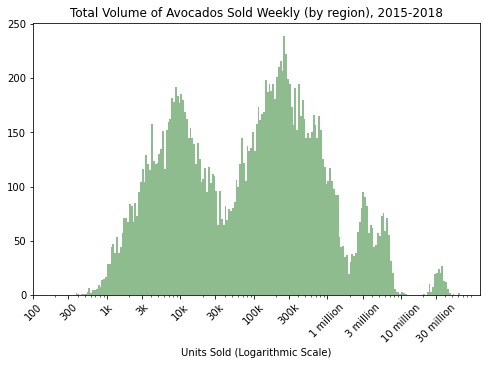

In [18]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(avocados['total_volume'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = avocados, x = 'total_volume', bins = bins, color='darkseagreen')
plt.xscale('log')
plt.xticks([100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000], 
           [100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million', '30 million'], 
           rotation=45)
plt.xlabel('Units Sold (Logarithmic Scale)')
plt.title('Total Volume of Avocados Sold Weekly (by region), 2015-2018')
plt.show()

Volume has a long-tailed distribution, with the majority of units sold weekly at the smaller end and very few sold at the larger end. When plotted on a log-scale, the volume distribution looks roughly trimodal. There are peeks between 3k and 30k units, 100k and 1 million units, and a small peek around 3 million units. There is also a fourth very small peek between 10 and 30 million. It would be interesting to see if these peeks are associated with sales trends in different regions.

Next, I wanted to see how the volume of each size of avocado differed. Using the PLUs, I already divided the avocados into small/medium, large, and extra large sizes with each column containing the volume sold of that size.

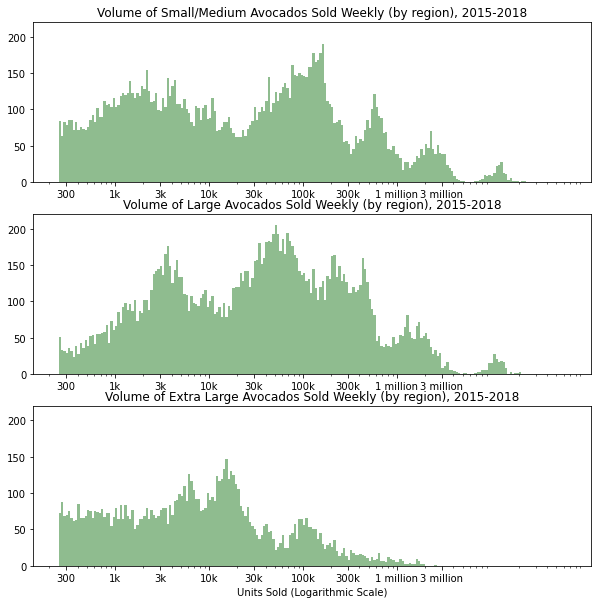

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10,10))


axes[0].hist(data = avocados, x = 'small_medium', bins = bins, color='darkseagreen')
axes[1].hist(data = avocados, x = 'large', bins = bins, color='darkseagreen')
axes[2].hist(data = avocados, x = 'extra_large', bins = bins, color='darkseagreen')

plt.xlabel('Units Sold (Logarithmic Scale)')

plt.setp(axes, xscale='log', xticks=[300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000],
         xticklabels=[300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million'], )

axes[0].title.set_text('Volume of Small/Medium Avocados Sold Weekly (by region), 2015-2018')
axes[1].title.set_text('Volume of Large Avocados Sold Weekly (by region), 2015-2018')
axes[2].title.set_text('Volume of Extra Large Avocados Sold Weekly (by region), 2015-2018')

axes[0].set_ylim(0,220)
axes[1].set_ylim(0,220)
axes[2].set_ylim(0,220)

plt.show()

Small/medium and large avocados follow a similar distribution to the total volume. For the small/medium avocados, the volume has a peek between 1k and 3k and a larger peek between 100k and 300k. The large avocados have two main peeks, one around 3k and one between 30k and 100k. The extra large avocados stay much more steady, with a small peek between 10k and 30k.

Therefore, the extra large avocados appear to have lower volume overall and have comparitively fewer sales volumes over 30k than the small/medium and large avocados. Both small/medium and large avocados have small peeks in between 1 and 3 million. 

In [20]:
print(avocados.small_medium.describe())
print(avocados.large.describe())
print(avocados.extra_large.describe())

count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: small_medium, dtype: float64
count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: large, dtype: float64
count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: extra_large, dtype: float64


I decided to check the stats of each size of avocado to see more of the details. As we predicted from the histograms, the average volume of sales for the extra large avocados is significantly smaller than either small/medium or large avocados. The bottom 25%+ of the extra large avocado sales volume is 0.

It will be interesting to see if the size of avocado sold is influenced by season or type. I would guess that organic avocados are generally smaller. There is also the possibility that extra large avocados have lower availability or that the availability is dependent on season.


I also wanted to see how many total bags were being sold. Because unit price is usually lower when purchasing in bulk, it would be interesting to check for a relationship between total bags sold and unit price.

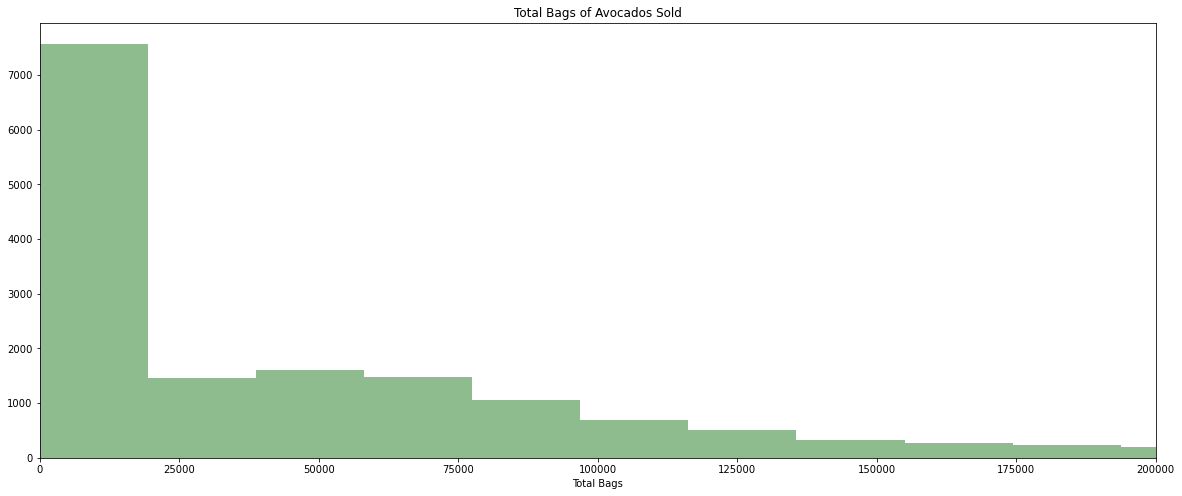

In [21]:
plt.figure(figsize=[20,8])

plt.hist(data=avocados, x='total_bags', color='darkseagreen', bins=1000)

# Limit x-axis to focus on majority of data
plt.xlim(0, 200000)


plt.xlabel('Total Bags')
plt.title('Total Bags of Avocados Sold');

Even when we limit the x-axis to exclude the long tail, the histogram of total bags sold is very right skewed. It seems that with the exception of relatively few observations, most weeks see less than 25k total bags sold. 

Next, I wanted to check to make sure that we had enough data for both types of avocado, as well as how their sizes compared.

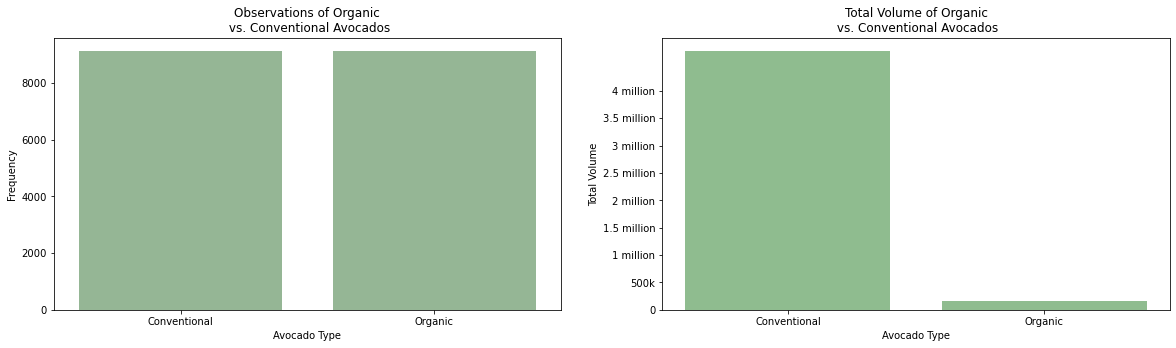

In [22]:
# Create subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,5))

# Create random sample of data
samples = np.random.choice(avocados.shape[0], 2000, replace = False)
avocado_samp = avocados.loc[samples,:]

# Countplot of avocado types
sb.countplot(data=avocados, x='organic', color='darkseagreen', ax=axes[0])

# Label and title first plot
axes[0].set_xlabel('Avocado Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Observations of Organic\n vs. Conventional Avocados')
axes[0].set_xticklabels(['Conventional', 'Organic'])

# Bar chart for season vs. price
#Use sample to speed up run time
axes[1].bar(x=avocado_samp['organic'], height=avocado_samp['total_volume'], color='darkseagreen')

# Label and title second plot
axes[1].set_xlabel('Avocado Type')
axes[1].set_ylabel('Total Volume')
axes[1].set_title('Total Volume of Organic\n vs. Conventional Avocados')

# Set ticks for second plot
axes[1].set_yticks([0, 0.5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7, 3.5e7, 4e7])
axes[1].set_yticklabels([0, '500k', '1 million', '1.5 million', '2 million', '2.5 million',
                        '3 million', '3.5 million', '4 million'])

axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Conventional', 'Organic']);


Roughly half of all the weekly records are for conventional while half are for organic avocados. This plot does not take into account the *volume* for each of these types, so I also checked that to see that there is a MUCH higher volume of conventional avocados sold than organic with almost 4 million compared to less than 500k.

Now I will look at another predictor indicator that we are interested in: average price.

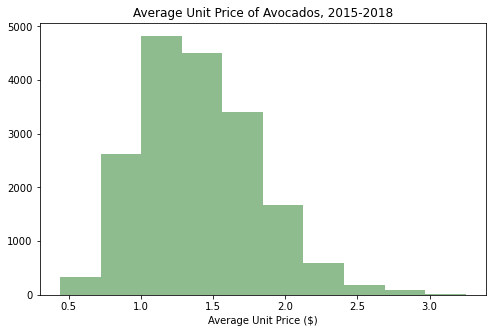

In [23]:
# histogram of average unit price of avocado
plt.figure(figsize=[8, 5])

plt.hist(data=avocados, x='average_price', color='darkseagreen')
plt.xlabel('Average Unit Price ($)')
plt.title('Average Unit Price of Avocados, 2015-2018');

The price of avocados per week per region is normally distributed with its peak between 1 and 1.25 dollars. The price ranges from a under 50 cents to above $3, but is mostly concentrated between 1 and 2 dollars per avocado.

Now I will look at another predictor value of interest: seasons.

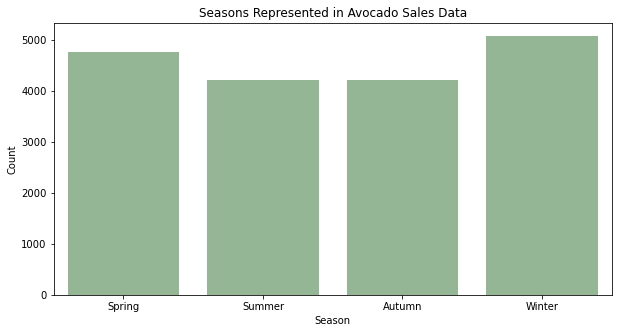

In [24]:
# countplot of seasons represented in data
plt.figure(figsize=[10, 5])

sb.countplot(data=avocados, x='season_name', color='darkseagreen')
plt.title('Seasons Represented in Avocado Sales Data')
plt.xlabel('Season')
plt.ylabel('Count');

The seasons seem to be fairly evenly represented, with winter having the maximum number of observations. This will ensure that we can accurately assess the seasonal trends because we have large amounts of data for all four seasons.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The total volume variable took on a large range of values with almost all collected in the lowest bin, so I looked at the data using a log transform. Under the transforation, the volume distribution looks roughly trimodal. There are peeks between 3k and 30k units, 100k and 1 million units, and a small peek around 3 million units.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created a new column called 'season_name' to organize the data into the four seasons in order to observe any seasonal trends in later explorations. Additionally, I renamed the three PLU number columns to more descriptive terms to help with interpretability and prevent any confusion.

## Bivariate Exploration<a class="anchor" id="bi"></a>



In [25]:
# Separate variables in numeric and categorical
numeric_vars = ['average_price', 'total_volume', 'small_medium', 'large', 'extra_large', 'total_bags']
categoric_vars = ['organic', 'region', 'season_name']

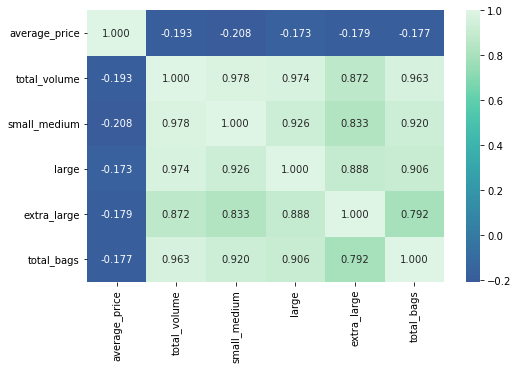

In [26]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(avocados[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'mako', center = 0)
plt.show()

As we would expect, there are very strong correlations between total volume and the volume of each subset (small_medium, large, and extra_large, as wells as total_bags). It is suprising to note that there is not an extremely strong correlation between price and volume; however, a negative correlation does exist. The negative correlation is strongest between the small/medium avocados and the price. There is also a correlation present between the number of bags sold and the total price of the avocados.

Now, I will visualize how price is related to type and season, two of our categorical variables.

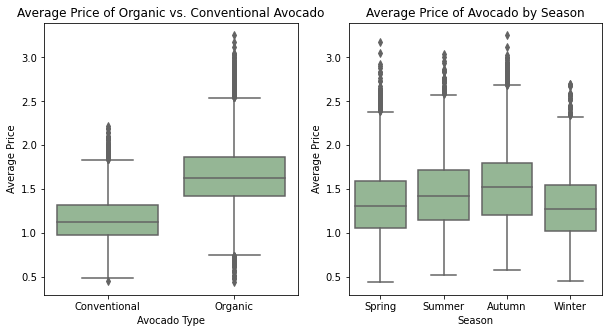

In [27]:
# Create subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

# Boxplot for type of avocado vs. price
sb.boxplot(x=avocados['organic'], y=avocados['average_price'], ax=axes[0], color='darkseagreen')

# Label and title first plot
axes[0].set_xticklabels(['Conventional', 'Organic'])
axes[0].set_xlabel('Avocado Type')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Price of Organic vs. Conventional Avocado')

# Boxplot for season vs. price
sb.boxplot(x=avocados['season_name'], y=avocados['average_price'], ax=axes[1], color='darkseagreen')

# Label and title second plot
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Average Price of Avocado by Season');


In [33]:
# View mean and quartiles for price of conventional avocados
avocados.iloc[avocados.query('organic ==0').index].average_price.describe()

count    9126.000000
mean        1.158040
std         0.263041
min         0.460000
25%         0.980000
50%         1.130000
75%         1.320000
max         2.220000
Name: average_price, dtype: float64

In [31]:
# View mean and quartiles for price of organic avocados
avocados.iloc[avocados.query('organic ==1').index].average_price.describe()

count    9123.000000
mean        1.653999
std         0.363502
min         0.440000
25%         1.420000
50%         1.630000
75%         1.870000
max         3.250000
Name: average_price, dtype: float64

The price of organic avocados is consistently higher than the price of conventional. The mean price for oganic is \\$1.65 compared to a mean price of \\$1.15 for conventional. The maximum price for organic is also drastically higher, with a maximum of \\$3.25 compared to the conventional's maximum of \\$2.22.

The average price also varies by season, though not as drastically. Autumn had the highest median price for avocados, while winter had the lowest. However, all of the medians were within 25 cents of each other.

These two variables tend to be pretty correlated with the season, so I want to see if we can get a little more detail by looking at the average price per month.

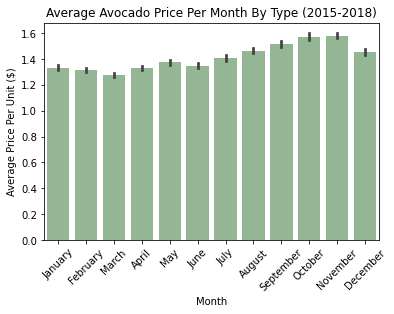

In [173]:
# Bar plot of average price by month
sb.barplot(x=month, y=avocados['average_price'], color='darkseagreen')

# Label axes and name table
plt.xlabel('Month')
plt.ylabel('Average Price Per Unit ($)')
plt.title('Average Avocado Price Per Month(2015-2018)')

# Set tick labels for months
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December'], rotation = 45);

The price of avocados seems to vary a lot by month! As we could expect from the highest prices being associated with autumn, the highest prices are observed in October and November. The lowest average price was in March, but the prices stay generally steady with a slow increase from June until October.

This made me wonder: How does this change in price correlate to the units sold during these months?

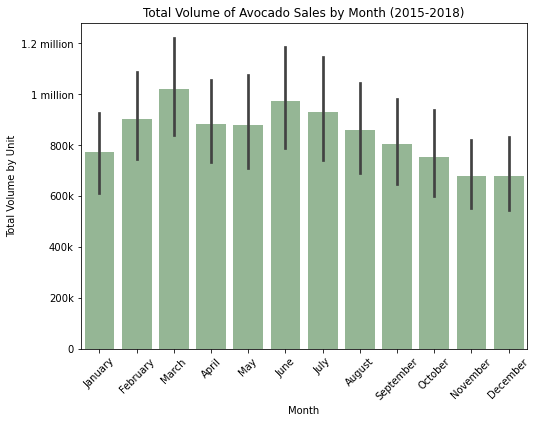

In [144]:
# Create cbar plot of volume by month for each type
plt.figure(figsize = [8,6])
sb.barplot(x=month, y=avocados['total_volume'], color='darkseagreen')

# Label axes and ticks
plt.ylabel('Total Volume by Unit')
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6], ['0', '200k', '400k', '600k', '800k', '1 million', '1.2 million'])
plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December'], rotation=45)

# Title Plot
plt.title('Total Volume of Avocado Sales by Month (2015-2018)');

The total volume fluctuates with the months much more than the price!

The months with the lowest volume sold on average are November, December, and January. The highest volume months were March and June. The two months with the highest prices (October and November) have volumes below average, with December being one of the two lowest months. The months with the lowest price (March) has the highest volume. 

In fact, the trends for the months tend to be directly opposite of each other, showing a *seasonal* negative correlation between price and volume sold.

After noticing that the months provided a little more evidence for a relationship between price and volume, I wanted to take a closer look at the relationship between average price and total volume sold.

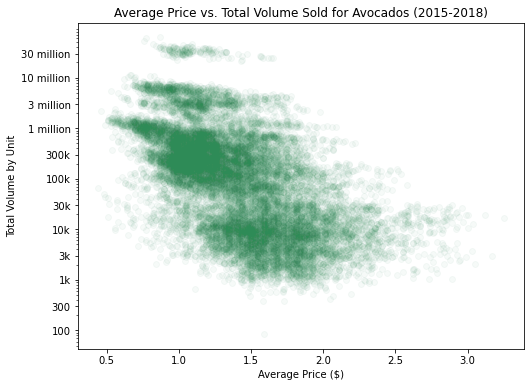

In [28]:
plt.figure(figsize = [8, 6])

# Create scatterplots of price vs. volume for both type
# Data is very overplotted so alpha=1/20
plt.scatter(data = avocados, x = 'average_price', y = 'total_volume', alpha = 1/25, color = 'seagreen')


# Volume has large range so better represented by log scale
plt.yscale('log')
plt.yticks([100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000], 
           [100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million', '30 million'])

# Label and title plot
plt.xlabel('Average Price ($)')
plt.ylabel('Total Volume by Unit')
plt.title('Average Price vs. Total Volume Sold for Avocados (2015-2018)')
plt.show();

Even with the log scale, there does not appear to be a strong relationship between volume and average price. We can see the weak negative relationship with the price getting higher as the volume gets lower. However, the majority of the data points are clumped together between 100k and 1 million total volume and between 1 and 1.5 dollars. There is another less defined clump with lower volume (between 3k and 10k) and slighly higher prices (between about 1.25 and 1.5 dollars).

Since we have already observed a strong relationshp between price and type, let's see how the price vs. volume plot looks if we separate the data into organic and conventional avocados.

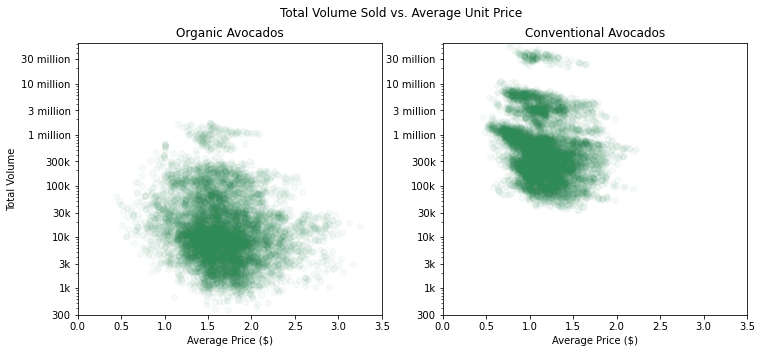

In [35]:
# Separate data into organic and conventional dataframes
organic = avocados.iloc[avocados.query('organic ==1').index]
conventional = avocados.iloc[avocados.query('organic ==0').index]

# Divide figure into two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,5))

# Create scatterplots of price vs. volume for both type
# Data is very overplotted so alpha=1/25
axes[0].scatter(x=organic['average_price'], y=organic['total_volume'], color='seagreen', alpha=1/25)
axes[1].scatter(x=conventional['average_price'], y=conventional['total_volume'], color='seagreen', alpha=1/25)

# Volume has large range so better represented by log scale
axes[0].set_yscale('log')

# Label and title first plot
axes[0].set_xlabel('Average Price ($)')
axes[0].set_ylabel('Total Volume')
axes[0].set_title('Organic Avocados')

# Label and title second plot
axes[1].set_yscale('log')
axes[1].set_xlabel('Average Price ($)')
axes[1].set_title('Conventional Avocados')

plt.suptitle('Total Volume Sold vs. Average Unit Price')

# Set axes to match log scale
plt.setp(axes, yscale='log', yticks=[300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000],
         yticklabels=[300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million', '30 million'])

# Set axis limits so axes are aligned and data is easy to accurately compare visually
axes[0].set_ylim([300,conventional.total_volume.max()])
axes[0].set_xlim(0,3.5)
axes[1].set_ylim([300,conventional.total_volume.max()])
axes[1].set_xlim(0,3.5);

In [37]:
conventional[['average_price', 'total_volume']].corr()

,average_price,total_volume
average_price,1.000000,-0.106885
total_volume,-0.106885,1.000000


In [38]:
organic[['average_price', 'total_volume']].corr()

,average_price,total_volume
average_price,1.000000,-0.086479
total_volume,-0.086479,1.000000


Again, we see the data fall into defined clumps. These clumps seem to show the two distinct clumps we saw in the combined data. For organic avocados, we see a defined clump at a lower volume (between 1k and 30k units) and higher price (between 1.5 and 2 dollars). For conventional avocados, we see a less defined clump. However, most of the data falls into a much higher range of volume (between 100k and 1 million units) and lower price (between 50 cents and 1.5 dollars). This matches the expectation that organic avocados are generally pricier.

Additionally, we can look at the correlation coefficients to see that while both types have weak negative correlations, the conventional avocados have a stronger correlation than the organic. This means that there is a stronger relationship between average price and total volume for the conventional avocados.

When assessing prices, I also wanted to check for a relationship between price and volume of bags. For simplicity, I am focusing on the total number of bags for this analysis.

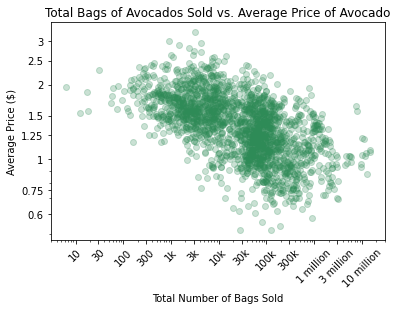

In [146]:
# Create random sample of data
samples = np.random.choice(avocados.shape[0], 2000, replace = False)
avocado_samp = avocados.loc[samples,:]

# Use sample to make visual clearer
plt.scatter(data=avocado_samp, x='total_bags', y='average_price', alpha=1/4, color='seagreen')

# Label and title
plt.xlabel('Total Number of Bags Sold')
plt.ylabel('Average Price ($)')
plt.title('Total Bags of Avocados Sold vs. Average Price of Avocado')

# Set x-scale to log as the bag data covers a large range
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000],
         [10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million'],
          rotation=45)

# Set y-scale to log as the bag data covers a large range
plt.yscale('log')
plt.yticks([0.6, 0.75, 1, 1.25, 1.5, 2, 2.5, 3], [0.6, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]);

There does appear to be a negative correlation between price and number of bags sold! As more bags are sold, the average price per unit decreases, matching the prediction and our findings in the correlation map above.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I found the lack of a strong relationship between average price and total volume by unit to be very surprising. However, the relationship became more clear when factoring in seasonal and monthly trends. In general, months with higher prices tended to have a lower volume of units sold and months with lower prices tended to have a higher volume of units sold.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Type of avocado has a huge impact on the price, as could be expected, with organic avocados costing significantly more. There is also a much smaller volume of organic avocados sold. Additionally, an increase in the total number of bags sold is correlated with a lower unit price.

## Multivariate Exploration<a class="anchor" id="multi"></a>


For the multivariate exploration, I am going to be focusing on price over time. We have seen that volume and price have a weak negative correlation and that seasons are also correlated with both price and volume. I will be exploring those relationships more during this exploration.

As I am interested in the average price of the avocados, I was curious to see how the price changed over time for both organic and conventional avocados to see if it was influenced by seasonal changes, trends, or years.

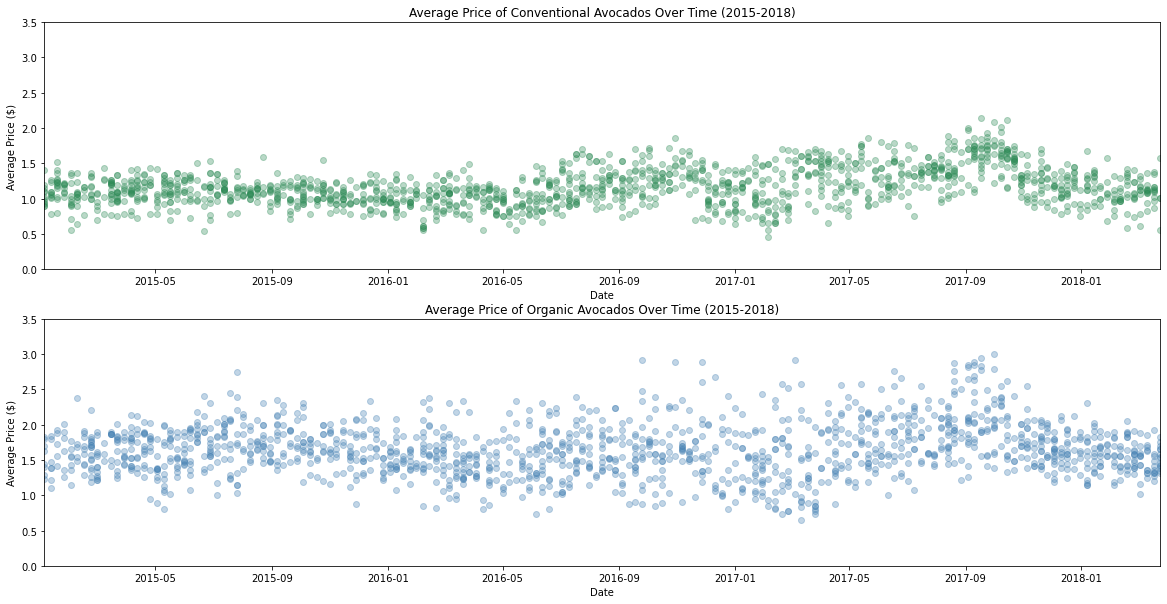

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20,10))

# Create random sample of data to prevent overplotting
samples = np.random.choice(avocados.shape[0], 3000, replace = False)
avocado_smp = avocados.loc[samples,:]

# Separate into conventional and organic
organic_smp = avocados.iloc[avocado_smp.query('organic ==1').index]
convent_smp = avocados.iloc[avocado_smp.query('organic ==0').index]

# Create a plot showing average price over time for organic and conventional 
axes[0].plot_date(convent_smp['date'], convent_smp['average_price'], alpha =1/3, color='seagreen')
axes[1].plot_date(organic_smp['date'], organic_smp['average_price'], alpha =1/3, color='steelblue')

# Label and title first plot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Price ($)')
axes[0].set_title('Average Price of Conventional Avocados Over Time (2015-2018)')

# Label and title second plot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Price ($)')
axes[1].set_title('Average Price of Organic Avocados Over Time (2015-2018)')

# Set axis limits so axes are aligned and data is easy to accurately compare visually
axes[0].set_xlim(convent_smp['date'].min(), convent_smp['date'].max())
axes[0].set_ylim([0,3.5])
axes[1].set_xlim(convent_smp['date'].min(), convent_smp['date'].max())
axes[1].set_ylim([0,3.5]);

The price over time stayed surprisingly steady! 

First, we will assess the conventional avocado prices. The autumnal increases in price are visible in both 2016 and 2017, as is the winter decrease that follows shortly after. However, the prices remain between 50 cents and 2 dollars for the majority of the time, with just a slight shift upward over time.

When looking at the organic avocados, the range of prices is much larger, with prices going as higher as $3 during the autumn of 2017. The seasonal trends also seem more defined with the organic avocados. Every autumn sees a spike followed by a dip in the winter. However, these are very loose trends because there is such variation in the data.

In addition to seeing the trends over time, I was wondering: Does the type of avocado (conventional or organic) change the seasonal trends in price and volume we've already observed?

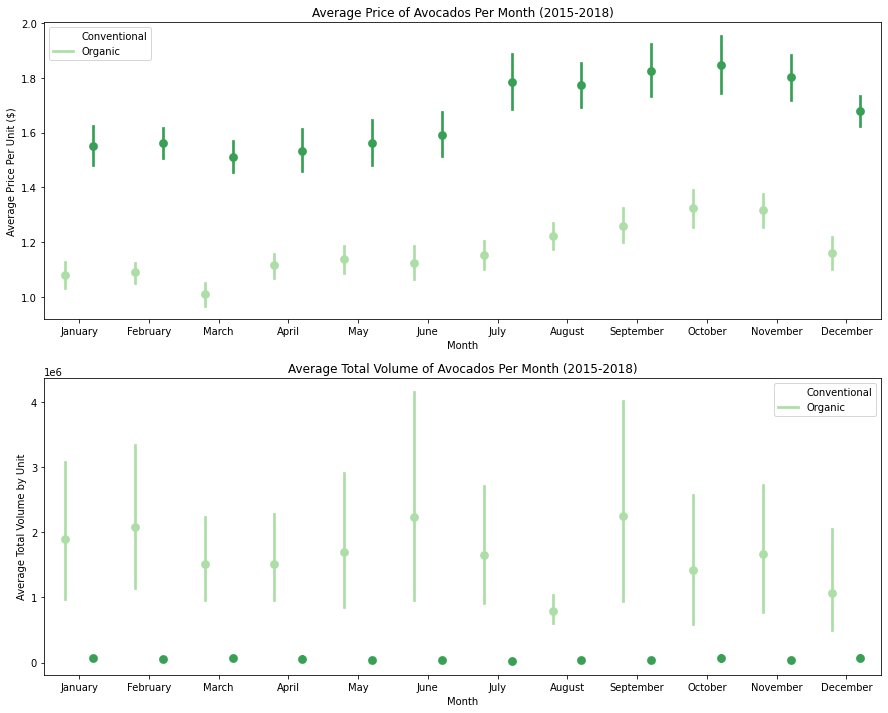

In [178]:
# Create random sample of data
samples = np.random.choice(avocados.shape[0], 2000, replace = False)
avocado_samp = avocados.loc[samples,:]

# Create subplot
fig, axes = plt.subplots(ncols = 1, nrows=2, figsize = [15,12])

# Create point plot for average price by month
sb.pointplot(data = avocado_samp, x = month, y = 'average_price', hue = 'organic',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = axes[0], align='center')

# Label first plot
axes[0].set_title('Average Price of Avocados Per Month (2015-2018)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Price Per Unit ($)')
axes[0].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December'])
axes[0].legend(labels=['Conventional', 'Organic'])

# Create point plot for total volume by month
sb.pointplot(data = avocado_samp, x = month, y = 'total_volume', hue = 'organic',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = axes[1], align='center')

# Label second plot
axes[1].set_title('Average Total Volume of Avocados Per Month (2015-2018)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Total Volume by Unit')
axes[1].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December'])
axes[1].legend(['Conventional', 'Organic'])

plt.show()

As we previously observed, the negative correlation between total volume and average price is much more evident when looking at seasonal trends. Interestingly, both types peak with their highest prices in October and November as expected. However, the lowest price for conventional avocados is in April while the lowest price for organic avocados is March. 

I wondered if ths volume of the organic avocados also differs from our observations of overall trends. However, the volume is so much lower than it is impossible to tell without making another plot. 

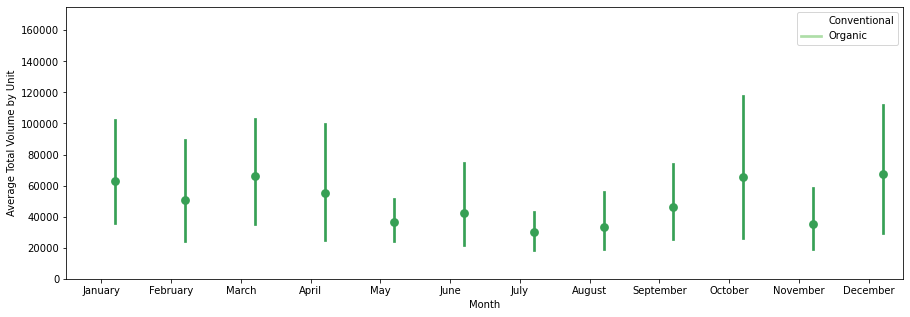

In [179]:
plt.figure(figsize=[15,5])

# Point plot of volume by month
sb.pointplot(data = avocado_samp, x = month, y = 'total_volume', hue = 'organic',
             palette = 'Greens', linestyles = '', dodge = 0.4)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December'])

# Label axes
plt.xlabel('Month')
plt.ylabel('Average Total Volume by Unit')

# Limit y-axis to show details of organic avocado volume
plt.ylim(0, 175000)

# Label legend
plt.legend(['Conventional', 'Organic']);

As we can see, the total volume of organic avocados is more consistent than conventional avocados. The volume does decrease in November, but it is just as low in May and July (on average). It seems that the correlation between price and volume seasonally is not as strong for organic avocados.


Lastly, I was also interested in the volume of the different sizes of avocados over time. Do some sizes have higher volumes during certain seasons-- do we see the expected seasonal trend? Has any size become more popular over time? Have avocados overall grown more popular over time? 

In [35]:
# Create rolling average for each size as well as total
# Rolling average creates a smoother, more easily interpretible line for identifying patterns
avocados[ 'rolling_avg_sm' ] = avocados.small_medium.rolling(8).mean()
avocados[ 'rolling_avg_lg' ] = avocados.large.rolling(8).mean()
avocados[ 'rolling_avg_xl' ] = avocados.extra_large.rolling(8).mean()
avocados[ 'rolling_avg_total' ] = avocados.total_volume.rolling(8).mean()


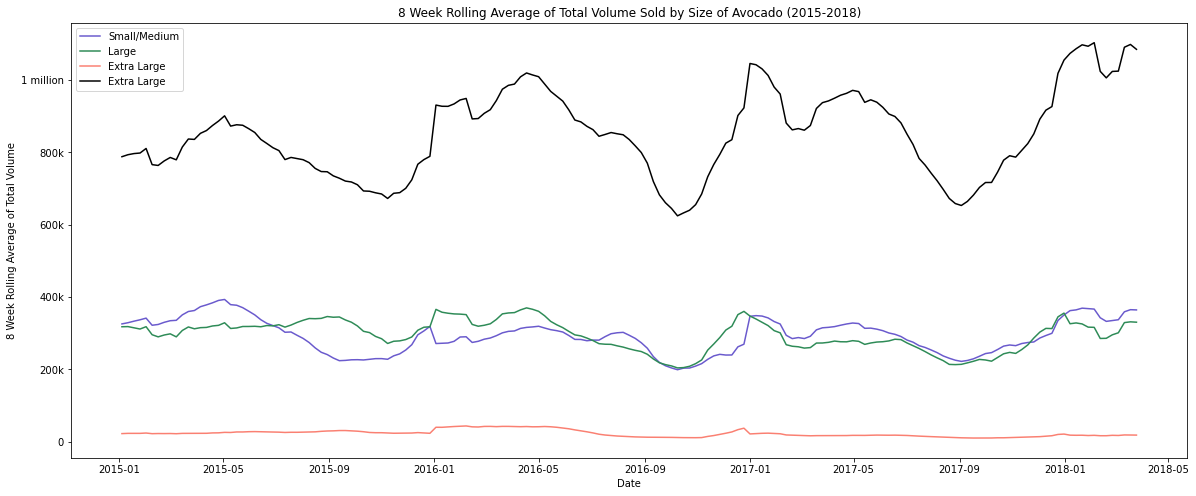

In [186]:
plt.figure(figsize=[20,8])

# Create line plot of rolling average for each size as well as total
sb.lineplot(data = avocados, x='date', y = 'rolling_avg_sm', ci=None, label='Small/Medium', color='slateblue')
sb.lineplot(data = avocados, x='date', y = 'rolling_avg_lg', ci=None, label='Large', color='seagreen')
sb.lineplot(data = avocados, x='date', y = 'rolling_avg_xl', ci=None, label='Extra Large', color='salmon')
sb.lineplot(data = avocados, x='date', y = 'rolling_avg_total', ci=None, label='Extra Large', color='black')

# Add labels and title
plt.ylabel('8 Week Rolling Average of Total Volume')
plt.xlabel('Date')
plt.title('8 Week Rolling Average of Total Volume Sold by Size of Avocado (2015-2018)')

# Format y ticks
plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6], ['0', '200k', '400k', '600k', '800k', '1 million']);

The seasonal trends are clearly visible in the small/medium and large avocados! We see pretty big dips after September for each year for both the total and the small/medium and large avocados. The decrease in volume seem to be more dramatic each year that passes, especially for the total volume. The extra large avocados have a much lower rolling average and don't seem to vary much. 

Seeing the different sizes further confirm that for the average avocado, volume will decrease in the autumn (and prices will probably increase!). 

It should also be noted that there seems to be an upward trend in the total volume of avocados throughout the three years. They really are trendy now!

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of price vs. volume by observing trends over time as well as trends for the different subgroups-- organic vs. conventional and three sizes.  The avocados with the largest volume sold match the seasonal trend most closely, with the organic avocados and extra large avocados tending to vary seemingly at random.

### Were there any interesting or surprising interactions between features?

> I was really surprised that the price did not change very much over the three year time period. I also think it's interesting that while there is a seasonal trend, it's not as drastic as I expected.

## Conclusion<a class="anchor" id="conclusion"></a>
Suprisingly, there is not a very strong correlation between the price and volume sold for avocados. It seems strange given the ever constant "supply and demand" explanations we are often given for price fluctuations.

But we just need to look closer! The price and volume of avocados changes with the seasons, and more specifically with the months, and it has done so consistently over a period of 3 years from 2015 to 2018! We saw this trend in several formats and it remained when we included the type of avocado and the size. 

Month by month, we see a negative correlation between average price and total volume: in months with higher average price, the volume goes down and vice versa. 

This correlation is really interesting and could be used to make some general predictions, but we don't know why it's happening. This brings us to another commonly said expression: correlation doesn't mean causation.

Even so, it's still interesting!

## Sources<a class="anchor" id="sources"></a>
### Data source
* Dataset: https://www.kaggle.com/neuromusic/avocado-prices 
* Original source: http://www.hassavocadoboard.com/retail/volume-and-price-data
* Information on data: https://loveonetoday.com/how-to/identify-hass-avocados/


### Other

* https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
* https://cmdlinetips.com/2020/07/cleaning_up_pandas-column-names/
* https://www.codegrepper.com/code-examples/python/replace+space+with+underscore+in+column+names+pandas
* https://stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas
* https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
* https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
* https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
* https://www.tutorialspoint.com/how-to-rotate-tick-labels-in-a-subplot-in-matplotlib
* https://www.geeksforgeeks.org/how-to-make-a-time-series-plot-with-rolling-average-in-python/
* https://moonbooks.org/Articles/How-to-create-a-table-of-contents-in-a-jupyter-notebook-/